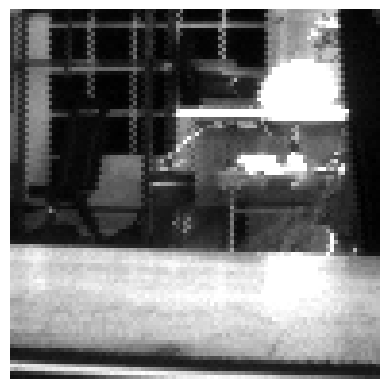

In [4]:
import serial
import struct
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Constants
cameraWidth = 96
cameraHeight = 96
cameraBytesPerPixel = 1
bytesPerFrame = cameraWidth * cameraHeight * cameraBytesPerPixel

ser = serial.Serial('COM5', 921600, timeout=1)

# Create a blank image to display the camera feed
image = Image.new("L", (cameraWidth, cameraHeight))  # "L" mode is for grayscale

# Function to read and display camera data in Jupyter
def read_frame():
    global image
    # Wait for the start of the frame
    header = ser.read(1)
    
    if header == b'\x55':  # Look for start byte
        second_byte = ser.read(1)
        if second_byte == b'\xAA':  # Check for second start byte
            
            # Try to read the frame buffer
            frameBuffer = ser.read(bytesPerFrame)
            
            # Ensure we received enough data
            if len(frameBuffer) == bytesPerFrame:
                
                # Update the image with the new data
                image.putdata(frameBuffer)
                
                # Display the image
                clear_output(wait=True)  # Clear previous output
                plt.imshow(ImageOps.flip(image), cmap='gray')  # Flip to correct orientation
                plt.axis('off')  # Hide axes
                display(plt.gcf())  # Display the current figure
            else:
                print("Incomplete frame received")
        else:
            print(f"Unexpected second byte: {second_byte}")
    else:
        print(f"Unexpected header byte: {header}")

# Read frames in a loop with some debug output
try:
    while True:
        read_frame()  # Attempt to read a frame
except KeyboardInterrupt:
    # Close the serial connection when interrupted
    ser.close()
